In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
from mlxtend.plotting import plot_decision_regions


In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/university_classification.csv')

In [6]:
dataset.head(5)

,uni_id,world_rank,research_score,teaching_score,industry_income,international_outlook,it_cs_ai_score,faculty_student_ratio,graduate_employability,ranking_tier
0,1,1,98.5,97.8,96.4,95.2,99.1,8.2,99.0,Elite
1,2,2,98.2,97.5,96.0,95.0,98.9,8.4,98.8,Elite
2,3,3,97.9,97.2,95.8,94.8,98.6,8.5,98.6,Elite
3,4,4,97.5,96.8,95.5,94.5,98.2,8.6,98.3,Elite
4,5,5,97.2,96.5,95.2,94.2,97.9,8.8,98.0,Elite


In [7]:
dataset.isnull().sum()

,0
uni_id,0
world_rank,0
research_score,0
teaching_score,0
industry_income,0
international_outlook,0
it_cs_ai_score,0
faculty_student_ratio,0
graduate_employability,0
ranking_tier,0


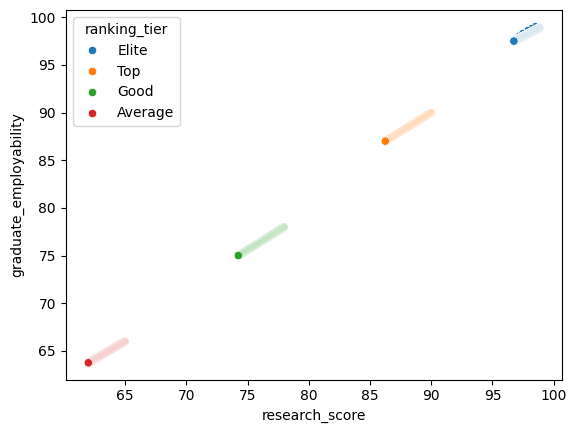

In [12]:
sns.scatterplot(x="research_score", y="graduate_employability", data=dataset, hue="ranking_tier")
plt.show()

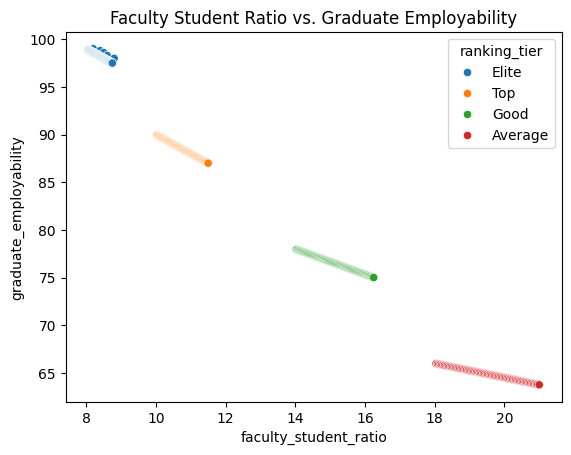

In [14]:
x = dataset.iloc[:,:-1]
y = dataset["ranking_tier"]

In [15]:
from sklearn.model_selection import train_test_split

In [35]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [17]:
from sklearn.svm import SVC

In [51]:
sv = SVC(kernel="linear")
sv.fit(x_train, y_train)

SVC(kernel='linear')

In [52]:
sv.score(x_test, y_test)*100

100.0

In [53]:
sv.score(x_train, y_train)*100

100.0

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


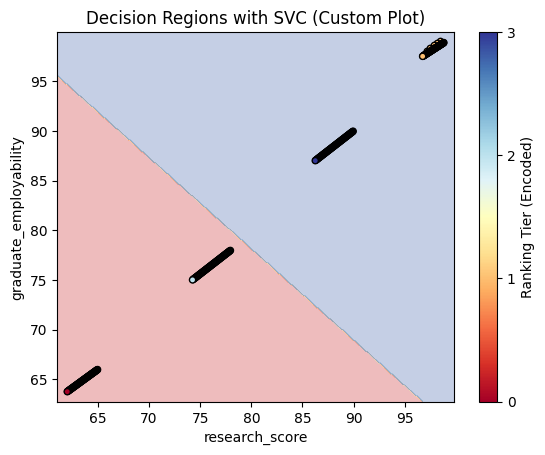

In [54]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Get the original class names for the legend
class_names = le.classes_

# Select the two features for plotting
feature1_index = 2 # research_score
feature2_index = 8 # graduate_employability

X_plot = x.iloc[:, [feature1_index, feature2_index]].to_numpy()
y_plot = y_encoded

# Get min, max and limits for contourf
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Create a dictionary of filler values for features not being plotted
# Ensure these are aligned with the original full feature set 'x'
filler_feature_values = {i: x.iloc[:, i].mean() for i in range(x.shape[1]) if i not in [feature1_index, feature2_index]}

# Prepare the input for prediction, filling in the non-plotting features
def create_input_for_prediction(mesh_x, mesh_y, x_template, feature1_idx, feature2_idx, filler_values):
    full_grid_points = []
    for val_x, val_y in zip(mesh_x.ravel(), mesh_y.ravel()):
        row = np.zeros(x_template.shape[1])
        row[feature1_idx] = val_x
        row[feature2_idx] = val_y
        for idx, val in filler_values.items():
            row[idx] = val
        full_grid_points.append(row)
    return np.array(full_grid_points)

# Predict over the meshgrid using the full feature set
Z_input = create_input_for_prediction(xx, yy, x, feature1_index, feature2_index, filler_feature_values)
Z = sv.predict(Z_input)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)

plt.xlabel(x.columns[feature1_index])
plt.ylabel(x.columns[feature2_index])
plt.title('Decision Regions with SVC (Custom Plot)')
plt.colorbar(ticks=np.unique(y_plot), label='Ranking Tier (Encoded)')
plt.show()

# **Support vector machine using Regression**

In [72]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_performance2000.csv')

In [73]:
dataset1.shape

(1000, 6)

In [74]:
dataset1.head(5)

,id,study_hours,attendance_percent,sleep_hours,previous_score,final_score
0,1,2.0,60.5,5.5,45,50
1,2,2.5,62.0,5.8,48,52
2,3,3.0,65.0,6.0,50,55
3,4,3.2,66.5,6.2,52,57
4,5,3.5,68.0,6.5,54,58


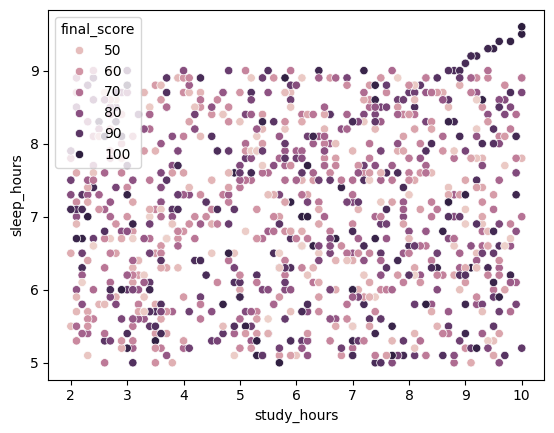

In [75]:
sns.scatterplot(x="study_hours", y="sleep_hours", data=dataset1, hue="final_score")
plt.show()

In [76]:
dataset1.isnull().sum()

,0
id,0
study_hours,0
attendance_percent,0
sleep_hours,0
previous_score,0
final_score,0
